In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# node class -------------------------
class node:
    #node constructor
    def __init__(self, Id, x_coordinate, y_coordinate):
        self.Id = Id
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate
        self.adjacentNodes = []
    # End init
# End Node Class

# find distance from one node to another
def distance(x1, y1, x2, y2):
    d = math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))
    return d    

# sequential distance
def sequentialDistance(node_arr, nodeId):
    totalDistance = 0
    for i in range(len(nodeId) - 1):
        x1 = node_arr[nodeId[i] - 1].x_coordinate
        y1 = node_arr[nodeId[i] - 1].y_coordinate
        x2 = node_arr[nodeId[i + 1] - 1].x_coordinate
        y2 = node_arr[nodeId[i + 1] - 1].y_coordinate
        totalDistance += distance(x1, y1, x2, y2)
    return totalDistance
#end sequential Distance
    
# BFS --------------------------
def BFS(startingNode, targetNode, node_arr):
    bfsPath = [] # final path
    queue = [startingNode.Id] # queue data structure
    visitedNode = [startingNode.Id] # node that has been visited
    visitedFrom = [0] # which node was visited node visited from
    
    # Run until there is nothing left on queue
    while len(queue) > 0:
        for x in range(len(node_arr[queue[0] - 1].adjacentNodes)):
            if node_arr[queue[0] - 1].adjacentNodes[x] not in visitedNode:
                queue.append(node_arr[queue[0] - 1].adjacentNodes[x])
                visitedNode.append(node_arr[queue[0] - 1].adjacentNodes[x])
                visitedFrom.append(queue[0])
                if visitedNode[-1] == targetNode.Id:
                    queue = [] #if targetNode is found, STOP/Exit loop
        if len(queue) > 0:
            queue.pop(0)
    
    # if target node is not reachable
    if visitedNode[-1] != targetNode.Id:
        print("Target node not reached")
    else: # Track Back
        bfsPath.append(targetNode.Id)
        index = visitedNode.index(targetNode.Id)
        while index != 0: # until startingNode is reached
            bfsPath.append(visitedFrom[index])
            index = visitedNode.index(bfsPath[-1])
    bfsPath = bfsPath[::-1] # reverse an array, above code generates path backwards
    return bfsPath
#End BFS -----------------------------------------

try:
    file = open('11PointDFSBFS.tsp', 'r')
except:
    print('The file was not found!')

# read lines with node coordinates
lines = np.array(file.readlines())[7:]
node_arr = []
setOfNode = []
for line in range(len(lines)):
    x = lines[line].split()
    node_arr.append(node(int(x[0]), float(x[1]), float(x[2])))
    setOfNode.append(int(x[0]))

# assign adjacent nodeId and distance to nodeId
node_arr[0].adjacentNodes.extend((2, 3, 4))
node_arr[1].adjacentNodes.append(3)
node_arr[2].adjacentNodes.extend((4, 5))
node_arr[3].adjacentNodes.extend((5, 6, 7))
node_arr[4].adjacentNodes.extend((7, 8))
node_arr[5].adjacentNodes.append(8)
node_arr[6].adjacentNodes.extend((9, 10))
node_arr[7].adjacentNodes.extend((9, 10, 11))
node_arr[8].adjacentNodes.append(11)
node_arr[9].adjacentNodes.append(11)

bfsElapsedTime = []
for i in range(0, 1000, 1):
    startTime = time.time()
    bfsPath = BFS(node_arr[0], node_arr[10], node_arr)
    bfsDistance = sequentialDistance(node_arr, bfsPath)
    endTime = time.time()
    bfsElapsedTime.append(endTime - startTime)

bfsAverageElapsedTime = sum(bfsElapsedTime) / len(bfsElapsedTime)
print("BFS Average Time:", bfsAverageElapsedTime)

BFS Average Time: 8.145809173583984e-06


In [162]:
# DFS breaking ties in numerical order
def DFS(startingNode, targetNode, node_arr):
    dfsPath = []
    stack = [startingNode.Id]
    visitedNode = [startingNode.Id]
    visitedFrom = [0]
    
    # while stack is not empty
    while len(stack) > 0:
        if len(node_arr[stack[-1] - 1].adjacentNodes) == 0:
            print(node_arr[stack[-1] - 1].Id, "node isn't attached to any path")
        else:
            x = 0
            while x < len(node_arr[stack[-1] - 1].adjacentNodes):
                # if one of the adjacent node hasn't been visited
                if node_arr[stack[-1] -1].adjacentNodes[x] not in visitedNode:
                    visitedNode.append(node_arr[stack[-1] -1].adjacentNodes[x])
                    visitedFrom.append(stack[-1])
                    stack.append(node_arr[stack[-1] -1].adjacentNodes[x])
                    x = 0 #reset x to 0, when looking into adjacent nodes of new node
                # If no more node can be visited from the given node stack.pop()
                elif node_arr[stack[-1] -1].adjacentNodes[x] == node_arr[stack[-1] - 1].adjacentNodes[-1]:
                    print(stack)
                    stack.pop(-1)
                else: # if one of the adjacent node has been visited, check if next node has been visited
                    x += 1
                
                # if target node is reached, empty stack and break
                if node_arr[stack[-1] -1].adjacentNodes[x] == targetNode.Id:
                    visitedNode.append(node_arr[stack[-1] -1].adjacentNodes[x])
                    visitedFrom.append(stack[-1])
                    stack = []
                    break
    
    # if target node is not reachable
    if visitedNode[-1] != targetNode.Id:
        print("Target node not reached")
    else: # Track Back
        dfsPath.append(targetNode.Id)
        index = visitedNode.index(targetNode.Id)
        while index != 0: # until startingNode is reached
            dfsPath.append(visitedFrom[index])
            index = visitedNode.index(dfsPath[-1])
    dfsPath = dfsPath[::-1] # reverse an array, above code generates path backwards
    return dfsPath

dfsElapsedTime = []
for i in range(0, 1000, 1):
    startTime = time.time()
    dfsPath = DFS(node_arr[0], node_arr[10], node_arr)
    dfsDistance = sequentialDistance(node_arr, dfsPath)
    endTime = time.time()
    dfsElapsedTime.append(endTime - startTime)

dfsAverageElapsedTime = sum(dfsElapsedTime) / len(dfsElapsedTime)
print("DFS Average Time:",dfsAverageElapsedTime)

DFS Average Time: 2.0564556121826173e-05


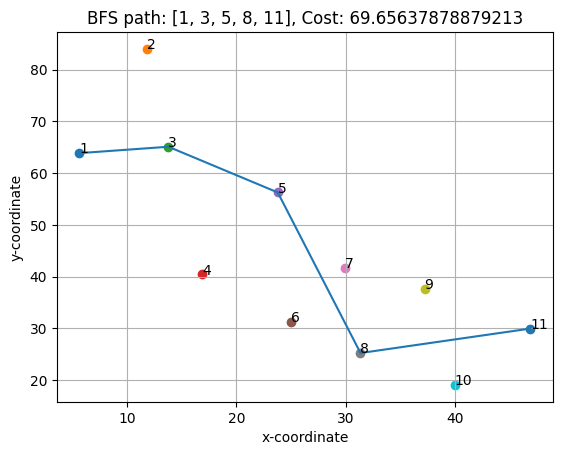

In [2]:
#plotting BFS
for i in range(len(node_arr)):
    plt.scatter(node_arr[i].x_coordinate, node_arr[i].y_coordinate)
    plt.text(node_arr[i].x_coordinate, node_arr[i].y_coordinate, node_arr[i].Id)

x = []
y = []
for i in bfsPath:
    x.append(node_arr[i-1].x_coordinate)
    y.append(node_arr[i-1].y_coordinate)

plt.plot(x, y)
plt.ylabel("y-coordinate")
plt.xlabel("x-coordinate")

plt.title("BFS path: " + str(bfsPath) + ", Cost: " + str(bfsDistance))
plt.grid(True)
plt.show()

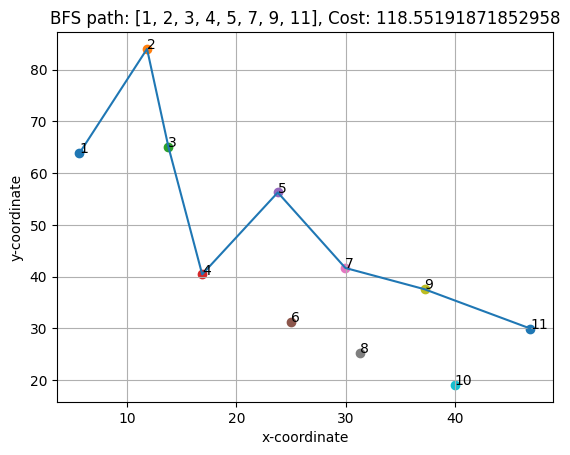

In [105]:
#plotting DFS
for i in range(len(node_arr)):
    plt.scatter(node_arr[i].x_coordinate, node_arr[i].y_coordinate)
    plt.text(node_arr[i].x_coordinate, node_arr[i].y_coordinate, node_arr[i].Id)

x = []
y = []
for i in dfsPath:
    x.append(node_arr[i-1].x_coordinate)
    y.append(node_arr[i-1].y_coordinate)

plt.plot(x, y)
plt.ylabel("y-coordinate")
plt.xlabel("x-coordinate")

plt.title("BFS path: " + str(dfsPath) + ", Cost: " + str(dfsDistance))
plt.grid(True)
plt.show()

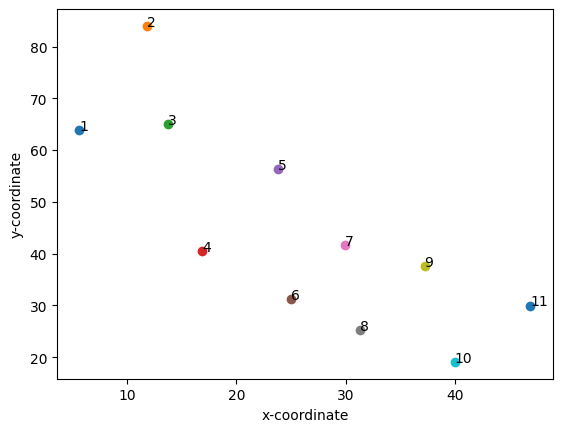

In [148]:
for i in range(len(node_arr)):
    plt.scatter(node_arr[i].x_coordinate, node_arr[i].y_coordinate)
    plt.text(node_arr[i].x_coordinate, node_arr[i].y_coordinate, node_arr[i].Id)


plt.ylabel("y-coordinate")
plt.xlabel("x-coordinate")
plt.show()